<a href="https://colab.research.google.com/github/Azj-lab/Azj-lab/blob/master/Assignment1FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1

For the first assignment, you will apply what you have learnt in the first labs. You have the opportunity to review and practice data cleaning and also SQL. The first dataset consists of data for loan applications at a bank. One row represents one past loan application, the features of the applicant and whether it was accepted or not. 

You will apply exploratory data analysis on it. You can use what you learnt previously from the first exercises. The methology behind this assignment is quite similar, but since the dataset is different you should sometimes adapt your code.

**Note: After your modifications the dataframe will change. You continue working on the modified version of the dataframe.**

### Important Notice : 
You are supposed to fill this notebook following the instructions (i.e. writing code in the cells with *#YOUR CODE HERE*). Your code should be able to provide the solution so that you can answer various questions posed in this notebook and in a Moodle Quiz. You'll be evaluated on both readability of the notebook and correctness of the answers given on Moodle.

So for this assignment you have to complete this notebook and then (you have to do BOTH!):

1. Submit your Python notebook here: https://moodle.unil.ch/mod/assign/view.php?id=787962
2. Answer the questions in this Moodle Quiz:
https://moodle.unil.ch/mod/quiz/view.php?id=786880 (you can only submit ONCE!)

In [0]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

<br>
First, load the file from our github link in a Dataframe.

In [37]:
url = 'https://raw.githubusercontent.com/michalis0/Business-Intelligence-and-Analytics/master/data/new_application_train_1.csv'
#YOUR CODE HERE
#load the file in a dataframe
dataframe = pd.read_csv(url)
#use the head() command to get a feeling of the data and the columns
dataframe.head()
#use the proper pandas command to find its dimensions
dataframe.size

3680838

***Question 1 :***
<br>
How many rows and columns does the dataset have? (without including the header). 

In [38]:
dataframe.shape

(29213, 126)

ROWS = 29123
COLUMNS = 126

<br>

The `'TARGET'` column indicates the people who have been given a loan (value of 0) and the ones who have not (value of 1). Using a barplot, show how many loans were given (TARGET=0) and how many were declined (TARGET=1).

**Hint:** Use *plot()* method on the result of *value_count()*

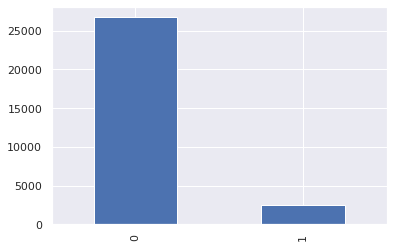

In [39]:
dataframe["TARGET"].value_counts().plot(kind="bar")

In [40]:
nul=dataframe.groupby("TARGET").TARGET.count()
nul

TARGET
0    26753
1     2460
Name: TARGET, dtype: int64

***Question 2 :*** <br>
How many loans were accepted (TARGET = 0) vs declined (TARGET = 1)?

<br>

Use the *describe* method to get some summary statistics about `'DAYS_BIRTH'` and `'DAYS_EMPLOYED'` columns. Do you recognize some weird values ? In the `'DAYS_EMPLOYED'` column, if you plot the histogram, you should see that there are some very large values, distant from the rest of the values. Remove those very large values (eg all the values more than X, you have to decide on the X based on the histogram that you see). These values don't make sense for this column. Plot the histogram of `'DAYS_EMPLOYED'` before and after the removal of those large values and the transformation that we recommend below.
<br>


**Hint:** The values in those two columns are negative because they correspond to a difference in number of days since the beginning of employment or birth. The following transformation can be useful: 
- Taking the absolute value (*abs()*) since we want positive numbers


In [41]:
#YOUR CODE HERE
# do abs transformations
dataframe["DAYS_EMPLOYED"]=dataframe ["DAYS_EMPLOYED"].abs()
dataframe["DAYS_BIRTH"] = dataframe ["DAYS_BIRTH"].abs()
# use describe
dataframe["DAYS_EMPLOYED"].describe(), dataframe ["DAYS_BIRTH"].describe()

(count     29213.000000
 mean      67580.005682
 std      139312.811196
 min           2.000000
 25%         940.000000
 50%        2236.000000
 75%        5732.000000
 max      365243.000000
 Name: DAYS_EMPLOYED, dtype: float64, count    29213.000000
 mean     16056.845001
 std       4343.780979
 min       7680.000000
 25%      12449.000000
 50%      15805.000000
 75%      19684.000000
 max      25196.000000
 Name: DAYS_BIRTH, dtype: float64)

**Answer Note:** Those ages look reasonable. There are no outliers for the age on either the high or low end. Employed days doesn't look right! The maximum value is about 1000 years!

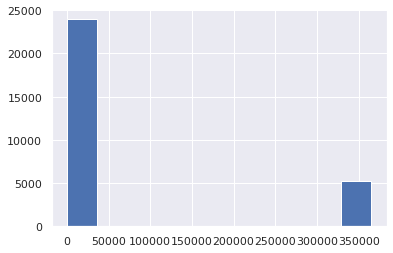

In [42]:
#YOUR CODE HERE
# do histogram of DAYS_EMPLOYED
dataframe["DAYS_EMPLOYED"].hist()

count    23965.000000
mean      2395.970874
std       2347.353272
min          2.000000
25%        767.000000
50%       1656.000000
75%       3198.000000
max      16481.000000
Name: DAYS_EMPLOYED, dtype: float64

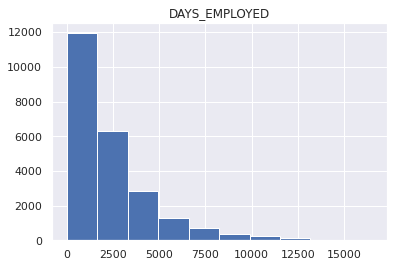

In [43]:
# YOUR CODE HERE
# remove the outliers from DAYS_EMPLOYED column
dataframe_filtered = dataframe[dataframe["DAYS_EMPLOYED"]< 300000]
# show the histogram now
dataframe_filtered.hist("DAYS_EMPLOYED")
# use the describe on the new values
dataframe_filtered["DAYS_EMPLOYED"].describe()

***Question 3:*** <br>
After the removal of the outliers, what is the new mean value of `'DAYS_EMPLOYED'` column? (rounded to the nearest integer)

In [44]:
dataframe_filtered["DAYS_EMPLOYED"].mean()

2395.970874191529

For each column, compute the number of missing entries and the percentage of the total rows in the column that it represents.

**Hint:** Consider summing the null values using the *isnull()* and *sum()* methods 

In [45]:
#YOUR CODE HERE
# compute missing values for all columns
dataframe_filtered.isnull().sum()
# compute percentage of missing values for all columns
dataframe.isnull().sum()/len(dataframe_filtered)*100

Unnamed: 0                       0.000000
Unnamed: 0.1                     0.000000
Unnamed: 0.1.1                   0.000000
SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.000000
AMT_GOODS_PRICE                  0.125183
NAME_TYPE_SUITE                  0.521594
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0

***Question 4:*** <br>
What is the number of missing values for the column `'OWN_CAR_AGE'`? 

In [46]:
dataframe_filtered.OWN_CAR_AGE.isnull().sum()

14860

***Question 5:*** <br>
What is the percentage of missing values for the column `'COMMONAREA_MODE'`? (rounded to the nearest integer)

Write some code to get the datatype (int64, float64...) of each column. For this just show the datatype of the columns as recognized by the default loading of the csv file (use command dtypes). Also count how many of each datatype you have.

In [47]:
#YOUR CODE HERE
(dataframe_filtered.COMMONAREA_MODE.isnull().sum()/len(dataframe_filtered)*100).round(0)

69.0

***Question 6:*** <br>
How many variables are numeric continuous (ie, “float64”) ? 

In [48]:
dataframe_filtered.dtypes.value_counts()

float64    65
int64      45
object     16
dtype: int64

65

***Question 7:*** <br>
How many variables are numeric discrete (ie, “int64”) ? 

45

***Question 8:*** <br>
How many variables are categorical (ie, “object”) ? 

16

Convert the column `'FLAG_CONT_MOBILE'` of our dataframe to a categorical variable.

In [49]:
#YOUR CODE HERE
dataframe_filtered ["FLAG_CONT_MOBILE"]= dataframe_filtered.FLAG_CONT_MOBILE.astype("category")
print(dataframe_filtered)

       Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL        OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
1

In [50]:
dataframe_filtered.dtypes.value_counts()

float64     65
int64       44
object      16
category     1
dtype: int64

<br>

Remove the NULL values (use the dropna function) and plot the distribution of the `AMT_CREDIT` and the `AMT_GOODS_PRICE`.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff4e1185908>]],
      dtype=object)

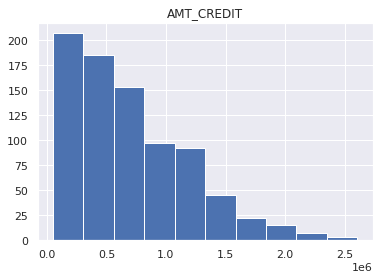

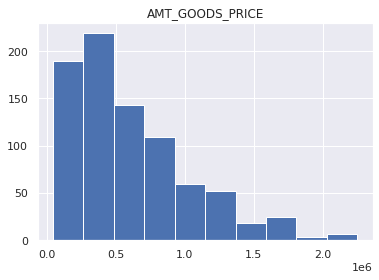

In [51]:
# drop null values
#YOUR CODE HERE
dataframe_filtered = dataframe_filtered.dropna()
# plot histogram 1
#YOUR CODE HERE
dataframe_filtered.hist("AMT_CREDIT")
# plot histogram 2
#YOUR CODE HERE
dataframe_filtered.hist("AMT_GOODS_PRICE")

***Question 9:***<br>
What distribution does the `AMT_CREDIT` and the `AMT_GOODS_PRICE` histogram resemble?

- Gaussian
- Uniform
- None of the above



Create a pie chart that shows proportion of different values in the column ``'NAME_INCOME_TYPE'`` (income sources of applicant's who applied for loan). You have to count the number of loans for each type and show are a pie chart.

**Hint:** Having a new Dataframe with the *index* and *values* of the result of *value_counts()* will make this plot easy

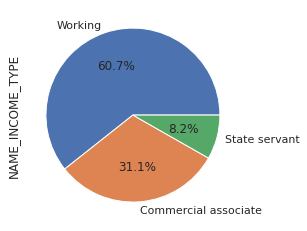

In [52]:
#YOUR CODE HERE
dataframe_filtered["NAME_INCOME_TYPE"].value_counts()
dataframe_filtered["NAME_INCOME_TYPE"].value_counts().plot(kind="pie",autopct='%.1f%%')

***Question 10*** : <br>
What is the percentage of rows that had the value 'Commercial associate' in that column (rounded to the nearest integer, just the number of the percentage without the %, only an integer in the quiz)

In [53]:
dataframe_filtered["NAME_INCOME_TYPE"].value_counts("Commercial associate")*100

Working                 60.653753
Commercial associate    31.113801
State servant            8.232446
Name: NAME_INCOME_TYPE, dtype: float64

Select the rows where `'NAME_CONTRACT_TYPE'` is *Cash loans* and `'AMT_INCOME_TOTAL'` is bigger than 225000

In [54]:
#YOUR CODE HERE
dataframe_filtered[(dataframe_filtered["AMT_INCOME_TOTAL"]>225000)& (dataframe_filtered["NAME_CONTRACT_TYPE"] == "Cash loans")]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,LESS_USE
64,64,64,46210,153537,0,Cash loans,F,Y,Y,0,675000.0,1223010.0,51817.5,1125000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.020246,17136,730,-7207.0,-665,10.0,1,1,1,1,0,0,Managers,2.0,3,3,MONDAY,6,0,0,0,0,0,0,Business Entity Type 3,0.752349,0.334870,0.732403,0.1649,0.1403,0.9747,0.6532,0.0601,0.0000,0.2759,0.1667,0.2083,0.1077,0.1345,0.1400,0.0000,0.0000,0.1681,0.1456,0.9747,0.6668,0.0607,0.0000,0.2759,0.1667,0.2083,0.1101,0.1469,0.1459,0.0000,0.0000,0.1665,0.1403,0.9747,0.6578,0.0605,0.00,0.2759,0.1667,0.2083,0.1096,0.1368,0.1425,0.0000,0.0000,reg oper account,block of flats,0.1101,Panel,No,4.0,0.0,4.0,0.0,-453.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,999999
72,72,72,251715,391254,0,Cash loans,M,Y,Y,0,675000.0,741555.0,59584.5,657000.0,Other_B,Commercial associate,Higher education,Married,House / apartment,0.046220,10388,1922,-234.0,-2619,11.0,1,1,0,1,0,1,Managers,2.0,1,1,TUESDAY,15,0,1,1,0,0,0,Business Entity Type 3,0.304968,0.324337,0.508287,0.2309,0.1048,0.9930,0.9048,0.0937,0.3200,0.1379,0.5417,0.5833,0.1109,0.1874,0.2847,0.0039,0.0037,0.2353,0.1087,0.9930,0.9085,0.0946,0.3222,0.1379,0.5417,0.5833,0.1134,0.2048,0.2966,0.0039,0.0039,0.2332,0.1048,0.9930,0.9061,0.0943,0.32,0.1379,0.5417,0.5833,0.1128,0.1907,0.2898,0.0039,0.0038,reg oper account,block of flats,0.2760,Panel,No,2.0,0.0,2.0,0.0,-355.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0,999999
351,351,351,187786,317692,0,Cash loans,F,Y,Y,0,315000.0,1800000.0,47484.0,1800000.0,Unaccompanied,Working,Higher education,Civil marriage,House / apartment,0.072508,17436,6011,-4194.0,-971,2.0,1,1,0,1,1,0,Managers,2.0,1,1,SATURDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.862239,0.746408,0.380800,0.1254,0.1644

***Question 11:*** <br>
How many rows satisfy a *Cash loans* contract and a *AMT total income* bigger than 225000?

In [55]:
len(dataframe_filtered[(dataframe_filtered["AMT_INCOME_TOTAL"] > 225000) & (dataframe_filtered["NAME_CONTRACT_TYPE"] == "Cash loans")])

228

Create a boxplot for the column `'FLOORSMAX_AVG'`

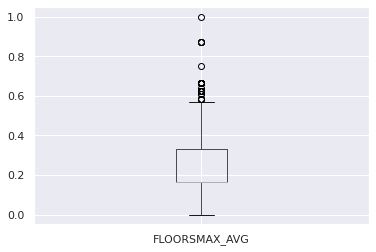

In [56]:
dataframe_filtered.boxplot("FLOORSMAX_AVG")

***Question 12:*** <br>
From the box plot on `'FLOORSMAX_AVG'`, are there more outliers with small or with large values?

Compute the pearson correlation of all the features with respect to the ``'TARGET'`` variable. Notice that some of the correlations are NaN. Use the 'dropna()' function to remove those values. Plot the 20 most positively correlated variables/columns to 'TARGET'. Plot the 20 most negatively correlated variables/columns to 'TARGET'. Sort them and put them in a **bar chart** for example. 

**Hint:** *corr()* method can be applied to Dataframes

In [57]:
#YOUR CODE HERE
dataframe_filtered.corrwith(dataframe_filtered["TARGET"]).dropna().sort_values()

EXT_SOURCE_3                   -0.198436
EXT_SOURCE_1                   -0.130036
EXT_SOURCE_2                   -0.118070
DAYS_EMPLOYED                  -0.081133
REGION_RATING_CLIENT           -0.078628
REGION_RATING_CLIENT_W_CITY    -0.073155
DAYS_BIRTH                     -0.056374
FLAG_DOCUMENT_13               -0.036662
FLOORSMIN_MEDI                 -0.034853
FLOORSMIN_AVG                  -0.034619
FLAG_DOCUMENT_5                -0.031060
LIVINGAREA_AVG                 -0.030241
LIVINGAREA_MEDI                -0.029538
ELEVATORS_AVG                  -0.028679
FLAG_DOCUMENT_16               -0.028536
FLOORSMIN_MODE                 -0.027723
NONLIVINGAPARTMENTS_AVG        -0.027647
ELEVATORS_MEDI                 -0.026484
NONLIVINGAPARTMENTS_MEDI       -0.026450
AMT_REQ_CREDIT_BUREAU_MON      -0.025646
NONLIVINGAPARTMENTS_MODE       -0.024717
AMT_REQ_CREDIT_BUREAU_HOUR     -0.024291
HOUR_APPR_PROCESS_START        -0.023838
ELEVATORS_MODE                 -0.023079
FLAG_DOCUMENT_18

In [58]:
dataframe_corr = dataframe_filtered.corrwith(dataframe_filtered["TARGET"]).dropna().sort_values(ascending = False)
dataframe_corr.head()

TARGET                        1.000000
DAYS_LAST_PHONE_CHANGE        0.081738
REG_REGION_NOT_LIVE_REGION    0.079236
FLAG_DOCUMENT_14              0.072046
SK_ID_CURR                    0.063751
dtype: float64

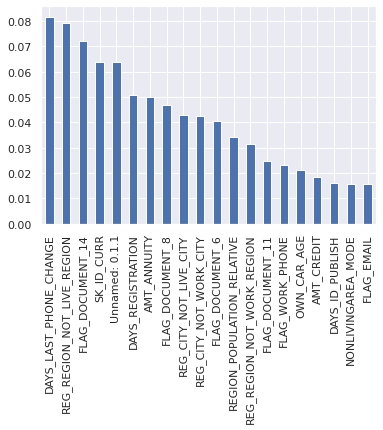

In [59]:
dataframe_corr[1:21].plot(kind="bar")

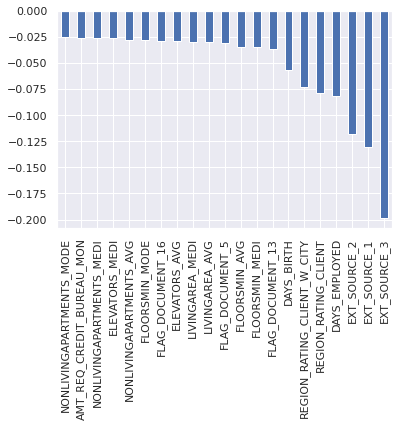

In [60]:
dataframe_corr[-21:].plot(kind = "bar")

***Question 13:*** <br>
What is the column with the highest positive correlation to the column ``'TARGET'`` (other than 'TARGET'!)?

DAYS_LAST_PHONE_CHANGE

***Question 14:*** <br>
What is the column with the second highest positive correlation to the column ``'TARGET'``?

REG_REGION_NOT_LIVE_REGION

***Question 15:*** <br>
What is the column **least** correlated to the column ``'TARGET'``?

**Remember:** We are looking for correlation close to zero.

BASAMENTAREA_MODE


Create a pairplot of columns `'LIVINGAPARTMENTS_AVG'`, `'APARTMENTS_MEDI'`, `'HOUR_APPR_PROCESS_START'` and `'REGION_RATING_CLIENT_W_CITY'`. Use the `'TARGET'` column as the *hue* argument

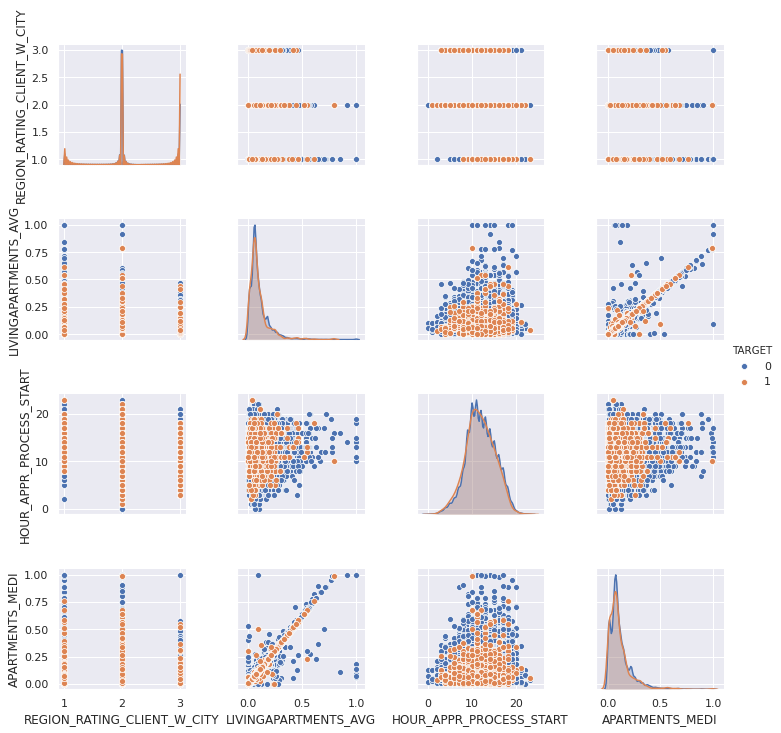

In [61]:
#YOUR CODE HERE
sns.pairplot(dataframe, hue = "TARGET", vars = ["REGION_RATING_CLIENT_W_CITY", "LIVINGAPARTMENTS_AVG", "HOUR_APPR_PROCESS_START", "APARTMENTS_MEDI"])

***Question 16:***<br>
Among the above variables, what are the 2 variables that are the most correlated?

Now, create a heatmap of correlations of columns `'DAYS_BIRTH'`, `'YEARS_BUILD_AVG'`, `'AMT_ANNUITY'` and `'TARGET'` 
 

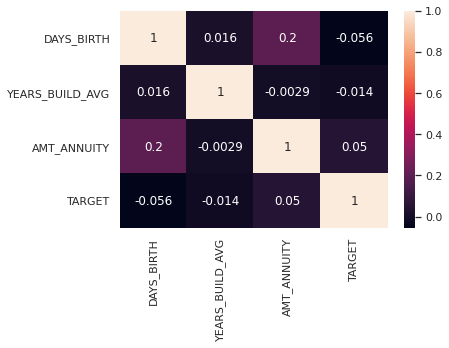

In [62]:
#YOUR CODE HERE
heat = ["DAYS_BIRTH", "YEARS_BUILD_AVG", "AMT_ANNUITY","TARGET"]
sns.heatmap(dataframe_filtered[heat].corr(), annot = True)

DAYS_BIRTH and TARGET

## SQL

Now you will test your knowledge of SQL with some statement. For this we will load the Titanic dataset which you also used in the lab. You have to answer the following questions.

In [0]:
# Load table from CSV file
import pandas as pd
from sqlalchemy import create_engine

# create the database
db = create_engine('sqlite://', echo=False)

# Titanic table
csvfile = 'https://raw.githubusercontent.com/michalis0/Business-Intelligence-and-Analytics/master/week6%20-%20SQL2/data/Titanic.csv'
df = pd.read_csv(csvfile)
table_name = "Titanic"
df.to_sql(table_name, con=db) # populate it with the data

***Question 17:***<br>
Are there any pairs of passengers with the same last name where one is in first class and the other is in third class? If so, return the last name and the two first names. Label the first-name columns 'first' for the passenger in first class and 'third' for the passenger in third class.

In [64]:
query = """

---YOUR QUERY HERE ----

select distinct* 
FROM titanic t1, titanic t2 
WHERE t1.last=t2.last 
AND t1.class = 1 
AND t2.class = 3

"""
sql_df = pd.read_sql(query, con=db)
sql_df

,index,last,first,gender,age,class,fare,embarked,survived,index,last,first,gender,age,class,fare,embarked,survived
0,730,Allen,Miss Elisabeth Walton,F,29.0,1,211.3375,Southampton,yes,4,Allen,Mr. William Henry,M,35.0,3,8.0500,Southampton,no
1,174,Smith,Mr. James Clinch,M,56.0,1,30.6958,Cherbourg,no,260,Smith,Mr. Thomas,M,NaN,3,7.7500,Queenstown,no
2,284,Smith,Mr. Richard William,M,NaN,1,26.0000,Southampton,no,260,Smith,Mr. Thomas,M,NaN,3,7.7500,Queenstown,no
3,155,Williams,Mr. Charles Duane,M,51.0,1,61.3792,Cherbourg,no,304,Williams,"Mr. Howard Hugh ""Harry""",M,NaN,3,8.0500,Southampton,no
4,572,Flynn,"Mr. John Irwin (""Irving"")",M,36.0,1,26.3875,Southampton,yes,428,Flynn,Mr. James,M,NaN,3,7.7500,Queenstown,no
5,857,Daly,Mr. Peter Denis,M,51.0,1,26.5500,Southampton,yes,510,Daly,Mr. Eugene Patrick,M,29.0,3,7.7500,Queenstown,yes
6,155,Williams,Mr. Charles Duane,M,51.0,1,61.3792,Cherbourg,no,735,Williams,Mr. Leslie,M,28.5,3,16.1000,Southampton,no
7,872,Carlsson,Mr. Frans Olof,M,33.0,1,5.0000,Southampton,no,756,Carlsson,Mr. August Sigfrid,M,28.0,3,7.7958,Southampton,no
8,572,Flynn,"Mr. John Irwin (""Irving"")",M,36.0,1,26.3875,Southampton,yes,825,Flynn,Mr. John,M,NaN,3,6.9500,Queenstown,no


***Question 18:***<br>
Which embarkation cities have more than 40 passengers whose age is missing? Reminder: Blanks in SQL tables are given a special value called 'null', and conditions 'A is null' and 'A is not null' can be used in Where clauses to check whether attribute A has the 'null' value.

In [65]:
query = """

---YOUR QUERY HERE ----

select embarked, count(embarked) as number_of_age_missing
FROM titanic
GROUP BY embarked, age
HAVING age is null
AND count(embarked) > 40
"""
sql_df = pd.read_sql(query, con=db)
sql_df

,embarked,number_of_age_missing
0,Queenstown,49
1,Southampton,90


***Question 19:***<br>
Find all classes where the average fare paid by passengers in that class was more than twice the overall average or less than half the overall average.

In [66]:
query = """

---YOUR QUERY HERE ----

SELECT class,avg(fare)
FROM Titanic
GROUP BY class
HAVING avg(fare) > 2*(SELECT avg(fare) FROM Titanic)
OR avg(fare) < 0.5*(SELECT avg(fare) FROM Titanic)
"""
sql_df = pd.read_sql(query, con=db)
sql_df

,class,avg(fare)
0,1,84.154687
1,3,13.675550


***Question 20:***<br>
List each class and its survival rate, i.e., the fraction of passengers in that class who survived. Try to round the number to the 2nd decimal digit.

In [67]:
query = """

---YOUR QUERY HERE ----
SELECT class, sum(CASE when survived = 'yes' then '1' when survived = 'no' then '0' end)
as survivors, count(first) as total, round(sum(CASE when survived='yes' then '1' when survived='no' then '0' end)*100/count(first),2)
as percentage from Titanic 
GROUP BY class
"""
sql_df = pd.read_sql(query, con=db)
sql_df

,class,survivors,total,percentage
0,1,136,216,62.0
1,2,87,184,47.0
2,3,119,491,24.0
